# The Goodies: Syntax
## Named Tuples

In [1]:
x = (a = 1, b = 1+1)

(a = 1, b = 2)

In [2]:
x.a

1

In [3]:
x.b

2

## Functions

In [1]:
f(x::Int64,y::Int64) = x + y

f (generic function with 1 method)

In [4]:
f(x::Float64,y::Float64) = x - y

f (generic function with 2 methods)

In [5]:
f(1,2)

3

In [6]:
f(1.0,2.0)

-1.0

### Anonymous Functions
* Anonymous functions are often used **as arguments to anthor funcitons.**

In [8]:
x -> x^2 + 2x - 1

#3 (generic function with 1 method)

In [9]:
function (x)
    x^2 + 2x -1
end

#5 (generic function with 1 method)

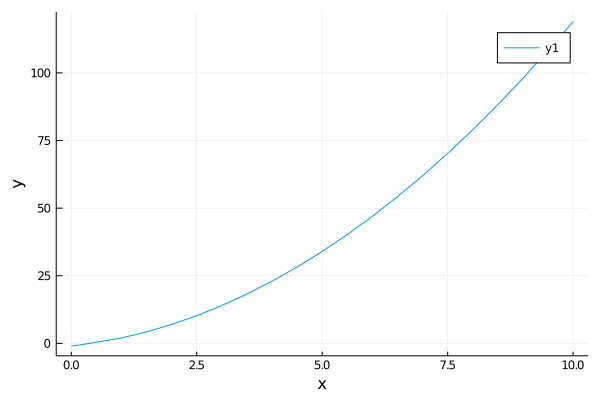

In [14]:
using Plots
plot(x -> x^2 + 2x - 1,0,10,xlabel="x",ylabel="y")

### Keyword Arguments
* `function fname(;arguments)`

In [39]:
function myplot(x,y; style="solid", width=1, color = "black")
    plot(x,y; line=Symbol(style), width=width, color = color)
end

myplot (generic function with 1 method)

In [42]:
x = collect(-π:0.01:π);
y = sin.(x);

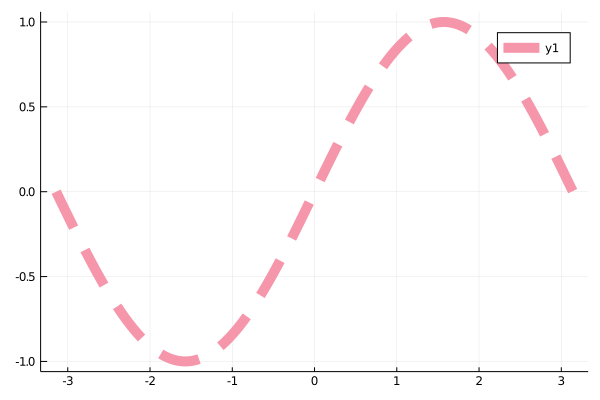

In [44]:
myplot(x,y;width=10,color="#F596AA",style = "dash")

In [46]:
Symbol("xs")

:xs

In [47]:
function test(x,y)
    x - y
end

test (generic function with 1 method)

In [48]:
test(1,2)

-1

In [49]:
test(x=1,y=2)

LoadError: MethodError: no method matching test(; x=1, y=2)
[0mClosest candidates are:
[0m  test([91m::Any[39m, [91m::Any[39m) at In[47]:1[91m got unsupported keyword arguments "x", "y"[39m

In [50]:
function test2(;x,y)
    x - y
end

test2 (generic function with 1 method)

In [51]:
test2(x=1,y=2)

-1

### Closures

In [61]:
foo(x) = () -> x

foo (generic function with 1 method)

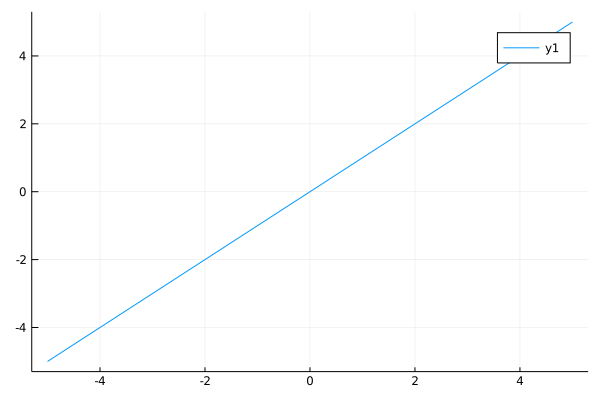

In [67]:
plot(x->foo(x)())

In [99]:
bar2 = foo(1)

#51 (generic function with 1 method)

In [69]:
foo(y) = x -> y*x

foo (generic function with 1 method)

In [97]:
# fig = plot(x->foo(1)(x))
ani = @animate for i in 1:100
    plot(x->foo(i)(x),ylims=[-50,50],grid=:none)
end

Animation("/tmp/jl_PhAbgr", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])

┌ Info: Saved animation to 
│   fn = /home/me/code/Julia/ThinkJulia/tmp.gif
└ @ Plots /home/me/.julia/packages/Plots/8GUYs/src/animation.jl:102


Plots.AnimatedGif("/home/me/code/Julia/ThinkJulia/tmp.gif")
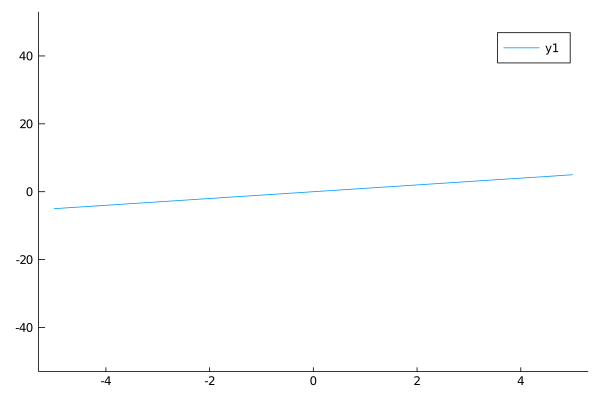

In [98]:
gif(ani)

## Blocks
```julia
begin
    ......
end
```

In [103]:
using ThinkJulia

┌ Info: Precompiling ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29]
└ @ Base loading.jl:1317
┌ Info: Skipping precompilation since __precompile__(false). Importing ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29].
└ @ Base loading.jl:1025


In [104]:
t = Turtle()

Turtle(0.0, 0.0, true, 0.0, (0.0, 0.0, 0.0))

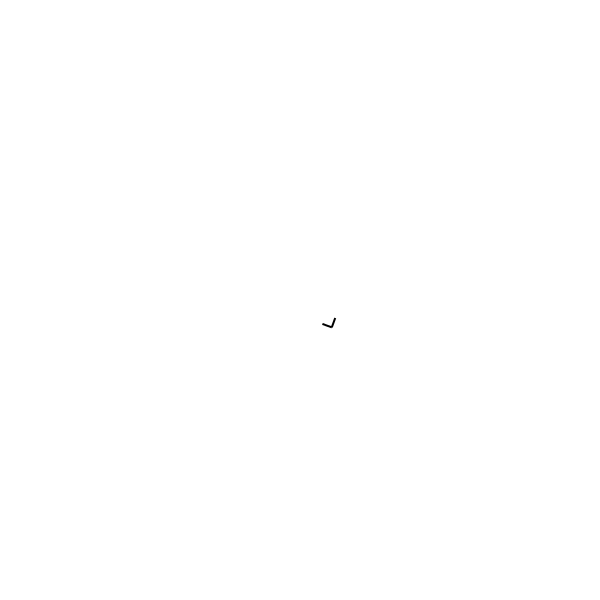

In [131]:
@svg begin
    forward(t,10)
    turn(t,90)
    forward(t,10)
end

In [132]:
for i in readdir(pwd())
    if length(i) > 3
        if i[(end-3):end]==".svg"
            rm(i)
        end
    end
end

### let Blocks
```julia
let
    ......
end
```

In [134]:
x, y, z = -1, -1, -1

(-1, -1, -1)

* not `let x=(1,z)` but `let (x = 1), z`, therefore `local z` is undefined

In [139]:
let x = 1, z
    @show x y z
end

x = 1
y = -1


LoadError: UndefVarError: z not defined

In [140]:
@show x y z

x = -1
y = -1
z = -1


-1

### do Blocks
```julia
open() do f
    write(f,args...)
end
```

In [173]:
data = "There here's the wattle,\nthe emblem of our land.\n";
open("Chap14/output.txt","w") do fout
    write(fout,data)
end

49

is equal to

In [174]:
f2 = fout -> begin
    write(fout, data)
end

#113 (generic function with 1 method)

In [ ]:
open(f2,"Chap14/output.txt","w")

`open(f::Founction, arg...)` ==
```julia
f_open = open(arg...)
try
    f(f_open)
finally
    close(f_open)
end
```

In [175]:
open(ff -> write(ff,data),"output.txt","w")

49

## Control Flow
### Ternary Operator
* `?:`

In [178]:
a = 150
a % 2 == 0 ? println("even") : println("odd")

even


### Short-Circuit Evaluation
* `&&` and `||`
    * `d1 || d2` 
    ```julia

        if !(d1)
            d2
        end
    ```
    
    * `d1 && d2`
    ```julia

        if d1
            d2
        end
    ```

In [179]:
function fact(n)
    n >= 0 || error("n must be non-negative")
    n == 0 && return 1
    n * fact(n-1)
end

fact (generic function with 1 method)

In [180]:
fact(-1)

LoadError: n must be non-negative

In [181]:
fact(10)

3628800

### Tasks
* like **generator** in python
* `::Channel` Type
* `put!(::Channel,::Any)`
* `Channel()` ==> Create a task
* `take!(Channel(Tasks))`

In [183]:
function fib(c::Channel)
    a = 0
    b = 1
    put!(c,a)
    while true
        put!(c,b)
        (a,b) = (b,a+b)
    end
end

fib (generic function with 1 method)

In [215]:
fib_gen=Channel(fib)

Channel{Any}(0) (1 item available)

In [193]:
take!(fib_gen)

21

In [202]:
function upper(c::Channel)
    a = 1
    while true
        put!(c,a)
        a+=1
    end
end
    

upper (generic function with 1 method)

In [218]:
upper_gen = Channel(upper)

Channel{Any}(0) (1 item available)

* `for` loop to task

In [222]:
for i in upper_gen
    print(i," ")
    i >= 20 && break
end

23 

## Types
### Primitive Types
* could be defined by self

In [228]:
primitive type Byte 8 end

In [229]:
Byte(val::UInt8) = reinterpret(Byte,val)

Byte

In [241]:
b = Byte(0x22)

Byte(0x22)

### Parametric Types

In [1]:
struct Point{T<:Real}
    x::T
    y::T
end

In [4]:
Point(1.0,2)

LoadError: MethodError: no method matching Point(::Float64, ::Int64)
[0mClosest candidates are:
[0m  Point(::T, [91m::T[39m) where T<:Real at In[1]:2

In [2]:
struct Point2{T1<:Real,T2<:Real}
    x::T1
    y::T2
end

In [5]:
Point2(1.0,2)

Point2{Float64, Int64}(1.0, 2)

### Type Unions
* `Union{Type1,Type2...}`

In [7]:
IntOrString = Union{Int64,String}

Union{Int64, String}

In [8]:
150 :: IntOrString

150

In [9]:
"Julia" :: IntOrString

"Julia"

## Methods
### Parametric Methods
`{f(p::Point{T}) where {T} }= ...`

In [6]:
isintpoint(p::Point{T}) where {T} = (T===Int64)

isintpoint (generic function with 1 method)

In [12]:
testpoint(p::Point{T}) where {T} = (T === Float64)

LoadError: UndefVarError: Point not defined

In [7]:
isintpoint(Point(1,2))

true

### Function-like Objects

In [1]:
struct Polynomial{R}
    coeff::Vector{R}
end

* val = a\[end\]
* val = a\[end\] * x + a\[end-1\]
* val = a\[end\] * x^2 + a\[end-1\] * x + a\[end-2\]

In [2]:
function (p::Polynomial)(x)
    val = p.coeff[end]
    for coeff in p.coeff[end-1:-1:1]
        val = val * x + coeff
    end
    val
end

In [3]:
p = Polynomial([1,100,20])

Polynomial{Int64}([1, 100, 20])

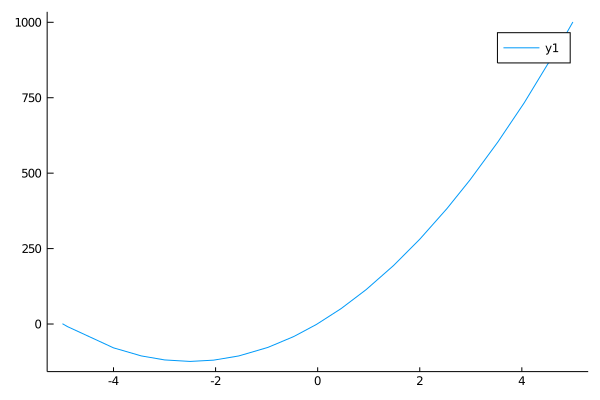

In [8]:
using Plots
plot(x->p(x),grid = :none)

## Constructors

In [26]:
struct Point{T<:Real}
    x :: T
    y :: T
    
    Point{T}(x,y) where {T<:Real} = new(x,y)
end

Point(x::T, y::T) where {T<:Real} = Point{T}(x,y);

In [28]:
Point(2,2.0)

LoadError: MethodError: no method matching Point(::Int64, ::Float64)
[0mClosest candidates are:
[0m  Point(::T, [91m::T[39m) where T<:Real at In[26]:8

In [29]:
Point(x::Real,y::Real) = Point(promote(x,y)...)

Point

## Conversion and Promotion
### Conversion
* `convert(type,value)`
* `ans`

In [34]:
x = 12
typeof(x)

Int64

In [38]:
convert(UInt8,x)

0x0c

In [39]:
typeof(ans)

UInt8

In [41]:
Base.convert(::Type{Point{T}}, x::Array{T,1}) where {T<:Real} = Point(x...)

In [64]:
convert(Point{Float32},Float32[1.0,2.0])

Point{Float32}(1.0f0, 2.0f0)

### Promotion
* conversion of values of mixed types to a single common type

In [70]:
promote([1,2,3.4,1//2])

([1.0, 2.0, 3.4, 0.5],)

In [73]:
typeof(1//2)

Rational{Int64}

In [4]:
Base.promote_rule(::Type{Rational{Int64}},::Type{Float64}) = Rational{Int64}

In [12]:
promote(2.0,1//2,21,21,4.5,0.033)

(2//1, 1//2, 21//1, 21//1, 9//2, 1188950301625811//36028797018963968)

## Metaprogramming
### Expressions
* `Meta.parse(String)`
* `:(var)`
* `Symbol(String)

In [13]:
prog = "1 + 2"

"1 + 2"

In [14]:
ex = Meta.parse(prog)

:(1 + 2)

In [15]:
typeof(ex)

Expr

In [17]:
dump(ex)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Int64 1
    3: Int64 2


In [22]:
a = 3

3

In [25]:
ex = quote
    1 + 2
end

quote
    #= In[25]:2 =#
    1 + 2
end

* `eval`

In [33]:
eval(ex)

3

### Macros
* maps a tuple of *Expr object* directly to a compiled expression.

In [35]:
macro containervariable(container,element)
    return esc(:($(Symbol(container, element)) = $container[$element]))
end

@containervariable (macro with 1 method)

In [65]:
@containervariable("letters",4)

't': ASCII/Unicode U+0074 (category Ll: Letter, lowercase)

In [66]:
letters4

't': ASCII/Unicode U+0074 (category Ll: Letter, lowercase)

In [68]:
@macroexpand @containervariable("letters",4)

:(letters4 = ("letters")[4])

In [56]:
:(letters1 = 2)

:(letters1 = 2)

In [60]:
a = 1

1

In [62]:
Symbol("a",1)

:a1

In [59]:
letters1

'l': ASCII/Unicode U+006C (category Ll: Letter, lowercase)

### Generated Functions
* could run in Julia but can't run in Jupyter don't know why

In [1]:
@generated function square(x)
    println(x)
    :(x * x)
end

square (generic function with 1 method)

In [ ]:
t = square(2);

## Missing Values
* `missing`
* `ismissing()`
* `skipmissing()`

In [3]:
c = missing

missing

In [4]:
ismissing(c)

true

In [6]:
a = [1, missing]

2-element Vector{Union{Missing, Int64}}:
 1
  missing

In [7]:
sum(a)

missing

In [8]:
sum(skipmissing(a))

1

## Calling C and Fortan Code

In [10]:
# Base.close(dbm::DBM) = gdbm_close(dbm.handle)
function gdbm_close(handle::Ptr{Cvoid})
    ccall((:gdbm_close, "libgdbm"),Cvoid, (Ptr{Cvoid},),handle)
end

gdbm_close (generic function with 1 method)